In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [2]:
# Array operations and examples
X = np.arange(12, dtype=np.int32)
Y = X.reshape((3, 4))
b = np.broadcast_to(Y, (2, 3, 4))
second_element = X[1:2]
from_third = X[2:]
reversed_X = X[::-1]
reverse_slice = X[11:-4:-1]
incremented_Y = Y + 1
is_even = Y % 2 == 0
even_elements = Y[Y % 2 == 0]
custom_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.int32)

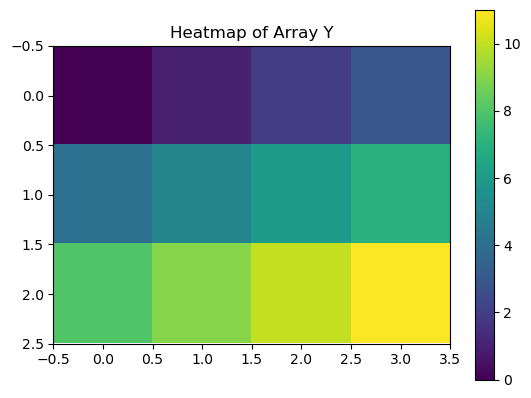

In [3]:


plt.imshow(Y, cmap='viridis')
plt.colorbar()
plt.title("Heatmap of Array Y")
plt.show()


In [4]:
# Broadcasting example
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
B = np.array([1, 0, 1])
C = A + B

In [5]:
# Identity matrix
identity_matr = np.eye(4).reshape(4, 4)
print("/Array 1: \n", identity_matr)

/Array 1: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
# Stacking arrays vertically and horizontally
a = np.array([1, 2, 3, 10])
b = np.array([4, 5, 6, 10])
v_stacked = np.vstack((a, b))
print("/Array 2: \n", v_stacked)
h_stacked = np.hstack((a, b))
print("/Array 3: \n", h_stacked)

/Array 2: 
 [[ 1  2  3 10]
 [ 4  5  6 10]]
/Array 3: 
 [ 1  2  3 10  4  5  6 10]


In [7]:
# Sparse matrix operations
A = csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
v = np.array([1, 0, -1])
result = A.dot(v)
print("Result of A.dot(v):", result)

Result of A.dot(v): [ 1 -3 -1]


# Text Feature Extraction with TF-IDF

## What is TF-IDF?
TF-IDF stands for "Term Frequency-Inverse Document Frequency". It is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus. The importance increases proportionally with the number of times a word appears in the document but is offset by the frequency of the word across the corpus.

TF-IDF can be used for a wide range of tasks including text classification, information retrieval, and topic modeling.

## Objective of this Notebook
In this notebook, we will:
1. Introduce the concept of TF-IDF.
2. Apply TF-IDF to a small corpus of text using Scikit-Learn's `TfidfVectorizer`.
3. Visualize the TF-IDF scores using a heatmap to understand the weight of words across documents.


In [8]:
# Sample text data
corpus = [
    "The quick brown fox jumped over the lazy dog.",
    "The dog slept under the veranda.",
    "The fox chased the rabbit into the thicket."
]

# Explain what is going to be done
print("We will now transform the text data into a TF-IDF matrix using TfidfVectorizer.")


We will now transform the text data into a TF-IDF matrix using TfidfVectorizer.


In [9]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# Convert to array for easy manipulation
X_array = X.toarray()


In [10]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Display feature names and TF-IDF matrix
print("Features:\n", feature_names)
print("\nTF-IDF Matrix:\n", X_array)

Features:
 ['brown' 'chased' 'dog' 'fox' 'into' 'jumped' 'lazy' 'over' 'quick'
 'rabbit' 'slept' 'the' 'thicket' 'under' 'veranda']

TF-IDF Matrix:
 [[0.36388646 0.         0.27674503 0.27674503 0.         0.36388646
  0.36388646 0.36388646 0.36388646 0.         0.         0.42983441
  0.         0.         0.        ]
 [0.         0.         0.34101521 0.         0.         0.
  0.         0.         0.         0.         0.44839402 0.52965746
  0.         0.44839402 0.44839402]
 [0.         0.3599581  0.         0.27375741 0.3599581  0.
  0.         0.         0.         0.3599581  0.         0.63779115
  0.3599581  0.         0.        ]]


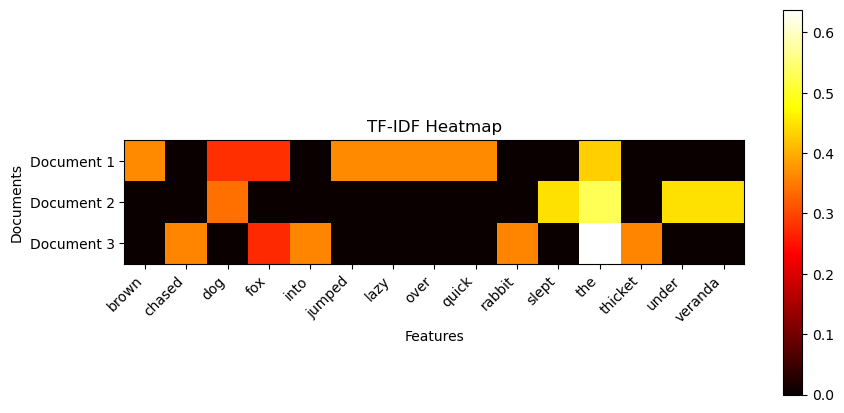

In [11]:
# Visualize the TF-IDF matrix as a heatmap
plt.figure(figsize=(10, 5))
plt.title("TF-IDF Heatmap")
plt.imshow(X_array, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel("Features")
plt.ylabel("Documents")
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45, ha='right')
plt.yticks(np.arange(len(corpus)), ['Document 1', 'Document 2', 'Document 3'])
plt.colorbar()
plt.show()